In [1]:
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.optimizers import SGD
from keras.datasets import mnist
from keras.utils import np_utils
from keras.utils import plot_model
import numpy as np
import os

Using TensorFlow backend.


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt

batch_size = 128
nb_classes = 10
epochs = 10
(X_train, y_train), (X_test, y_test) = mnist.load_data()    

In [3]:
model = None
if os.path.isfile('./mnist_model.h5') and os.path.isfile('./mnist_weightsandbias.h5'):
    model = load_model('mnist_model.h5')
    model.load_weights('mnist_weightsandbias.h5')

<IPython.core.display.Javascript object>


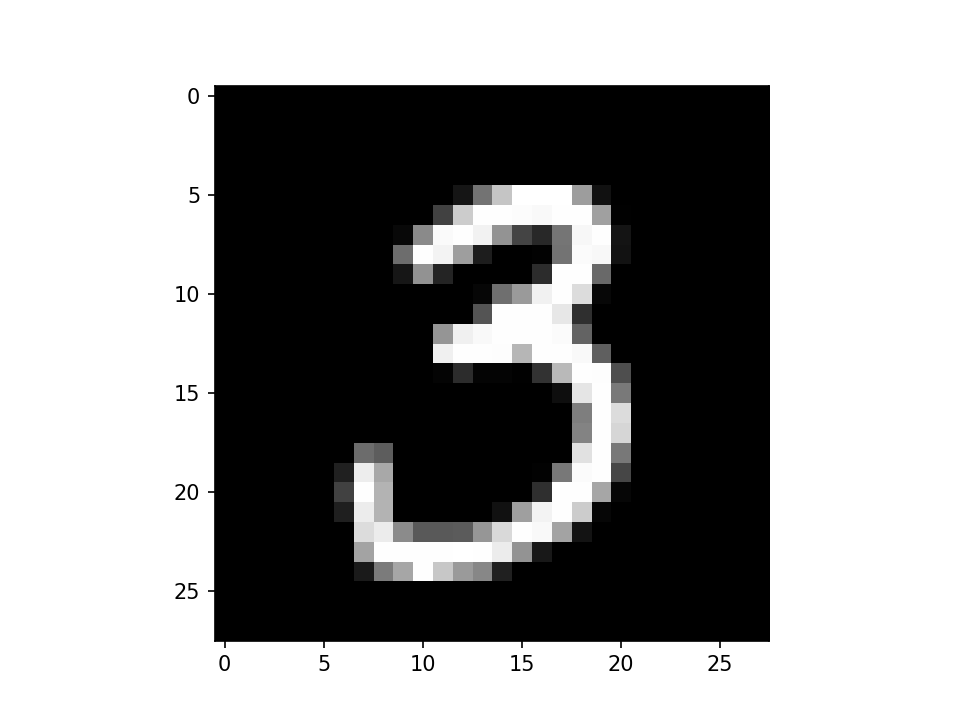

3


In [6]:
plt.imshow(X_train[90], cmap='gray')
label = y_train[90]
plt.imshow(X_test[90], cmap='gray')
plt.show()
label1 = y_test[90]
print(label1)

In [ ]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_Train = np_utils.to_categorical(y_train, nb_classes)
Y_Test = np_utils.to_categorical(y_test, nb_classes)
if model is None:
    print('Initializing Model from Scratch')
    model = Sequential()
    model.add(Dense(kernel_initializer="normal", activation="relu", input_shape=(784,), units=784))
    model.add(Dense(kernel_initializer="normal", activation="softmax",input_shape=(784,), units=10))
    model.compile(optimizer=SGD(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
else:
    print('Using already trained model')
model.summary()
history = model.fit(X_train, Y_Train, epochs=epochs, batch_size=batch_size, verbose=1)

In [ ]:
evaluation = model.evaluate(X_test, Y_Test, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

In [ ]:
model.save('mnist_model.h5')
model.save_weights('mnist_weightsandbias.h5')